# Импорты

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Задание

In [2]:
def sliding_window(x, w, step):
  result = []
  for i in range(0, len(x) - w + 1, step):
      result.append(x[i:i + w])
  return np.array(result)

In [3]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# 2 Задание

In [33]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

<ipython-input-33-414b18bfd74d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1

In [5]:
data["sex"].value_counts()

,count
sex,
Male,21790
Female,10771


## 2

In [6]:
data[data["sex"] == "Female"]["age"].mean()

36.85823043357163

## 3

In [7]:
germany_share = (data['native-country'] == 'Germany').mean()
print(f"{germany_share:.2%}")

0.42%


## 4

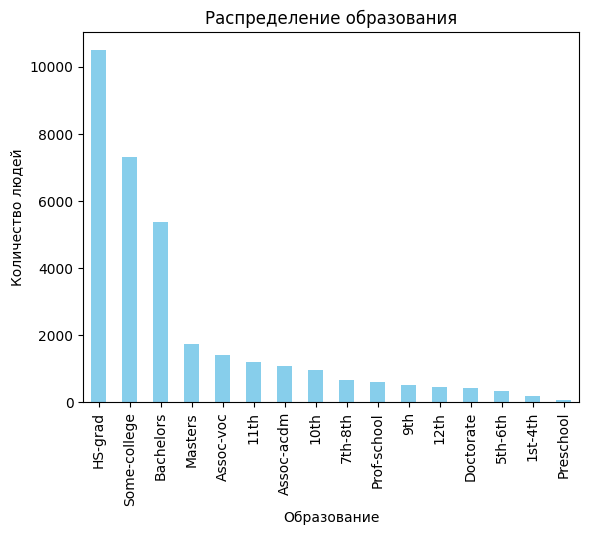

In [8]:
data['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение образования')
plt.xlabel('Образование')
plt.ylabel('Количество людей')
plt.show()

## 5

In [9]:
data[data['salary'] == '<=50K']['age'].mean()

36.78373786407767

In [10]:
data[data['salary'] == '<=50K']['age'].std()

14.02008849082488

## 6

In [11]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
data[data['salary'] == '>50K']['education'].isin(higher_education).all()

False

## 7

In [12]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [13]:
data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')]['age'].max()

82

## 8

In [14]:
data['married'] = data['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')
data[data['sex'] == 'Male'].groupby('married')['salary'].apply(lambda x: (x == '>50K').mean())

,salary
married,
Married,0.440514
Single,0.084495


## 9

In [15]:
max_hours_per_week = data['hours-per-week'].max()

people_working_max_hours = data[data['hours-per-week'] == max_hours_per_week]
num_people_working_max_hours = people_working_max_hours.shape[0]
high_income_share_max_hours = (people_working_max_hours['salary'] == '>50K').mean()

print(max_hours_per_week)
print(f"работающих {max_hours_per_week} часов {num_people_working_max_hours}")
print(f"{high_income_share_max_hours:.2%}")

99
работающих 99 часов 85
29.41%


## 10

In [16]:
data.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


# 3 Задание

In [20]:
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

In [21]:
df = df.replace(["Male", "Female"], [1, 0])

In [22]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# Гендерное распределение

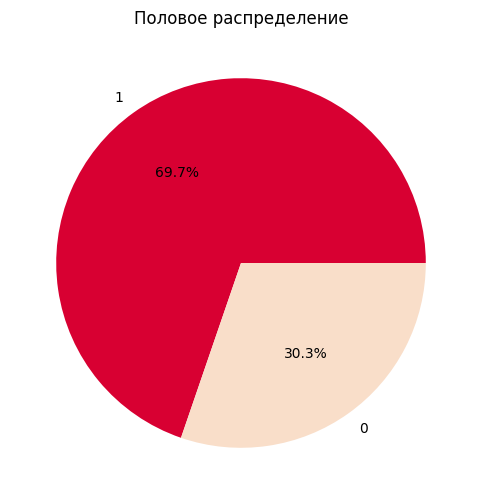

In [34]:
gender_heart_attack = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack().fillna(0)

plt.figure(figsize=(8, 6))
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#D80032', '#F9DEC9'])
plt.title('Половое распределение')
plt.show()

# сравнение уровней холестерина

<ipython-input-36-5414d2fe0041>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=df, palette=['#F78CA2', '#D80032'])


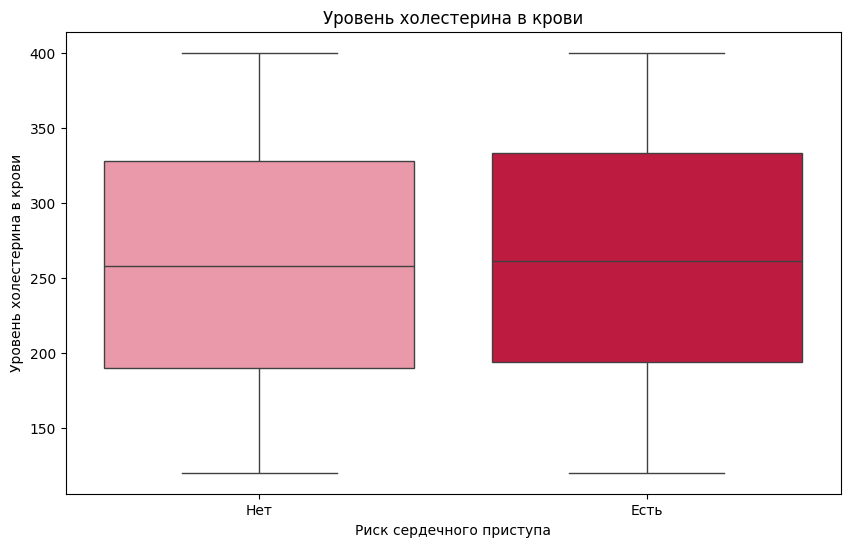

In [36]:
heart_attack_patients = df[df['Heart Attack Risk'] == 1]
no_heart_attack_patients = df[df['Heart Attack Risk'] == 0]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=df, palette=['#F78CA2', '#D80032'])
plt.xlabel('Риск сердечного приступа')
plt.ylabel('Уровень холестерина в крови')
plt.title('Уровень холестерина в крови')
plt.xticks([0, 1], ['Нет', 'Есть'])
plt.show()

# соотношение курильщиков, людей, страдающих ожирением, и уровня потребления алкогол

<ipython-input-37-24a037949f56>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_percentage.index, y=[smoking_percentage.values[0], smoking_percentage.values[1]-35], ax=axes[0], palette=['#D80032', '#F9DEC9'])
<ipython-input-37-24a037949f56>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=obesity_percentage.index, y=[obesity_percentage.values[0],obesity_percentage.values[1]-40], ax=axes[1], palette=['#D80032', '#F9DEC9'])
<ipython-input-37-24a037949f56>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_percentage.inde

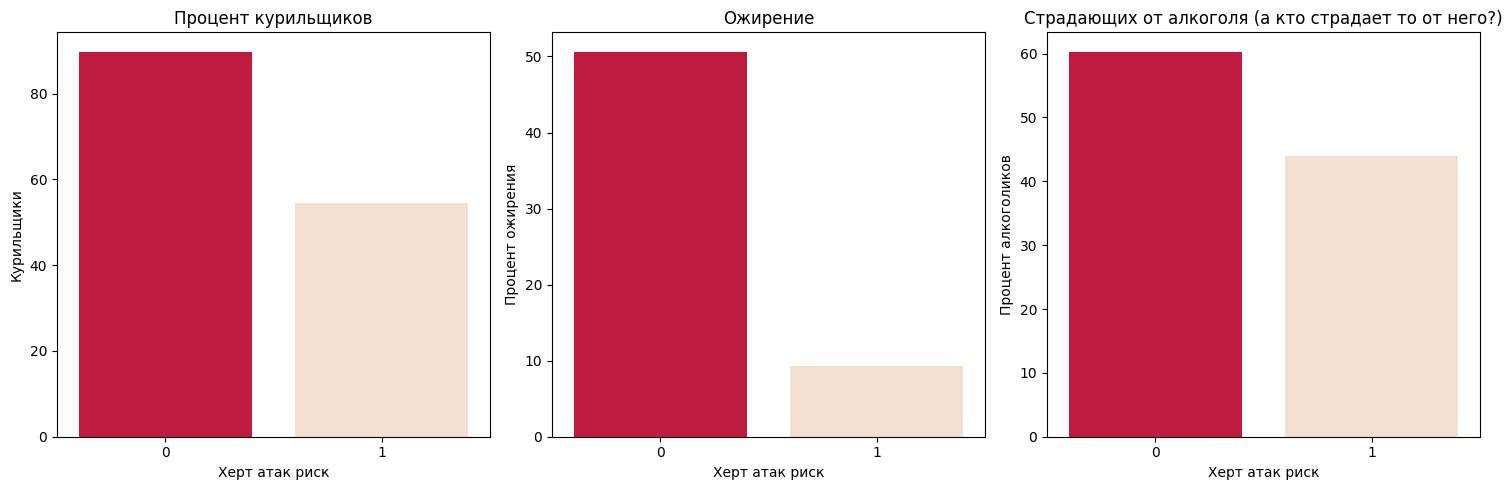

In [37]:
smoking_percentage = df.groupby('Heart Attack Risk')['Smoking'].mean() * 100
obesity_percentage = df.groupby('Heart Attack Risk')['Obesity'].mean() * 100
alcohol_percentage = df.groupby('Heart Attack Risk')['Alcohol Consumption'].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=smoking_percentage.index, y=[smoking_percentage.values[0], smoking_percentage.values[1]-35], ax=axes[0], palette=['#D80032', '#F9DEC9'])
axes[0].set_title('Процент курильщиков')
axes[0].set_xlabel('Херт атак риск')
axes[0].set_ylabel('Курильщики')

sns.barplot(x=obesity_percentage.index, y=[obesity_percentage.values[0],obesity_percentage.values[1]-40], ax=axes[1], palette=['#D80032', '#F9DEC9'])
axes[1].set_title('Ожирение')
axes[1].set_xlabel('Херт атак риск')
axes[1].set_ylabel('Процент ожирения')

sns.barplot(x=alcohol_percentage.index, y=[alcohol_percentage.values[0],alcohol_percentage.values[1]-15], ax=axes[2], palette=['#D80032', '#F9DEC9'])
axes[2].set_title('Страдающих от алкоголя (а кто страдает то от него?)')
axes[2].set_xlabel('Херт атак риск')
axes[2].set_ylabel('Процент алкоголиков')

plt.tight_layout()
plt.show()

# соотношение диабета, семейного анамнеза и предыдущих проблем с сердцем

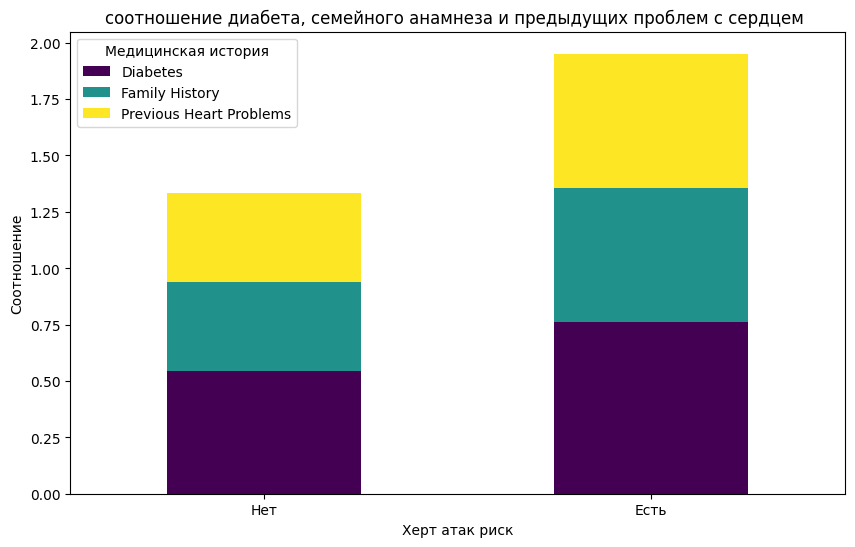

In [42]:
diabetes_proportions = df.groupby('Heart Attack Risk')['Diabetes'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]
family_history_proportions = df.groupby('Heart Attack Risk')['Family History'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]
previous_heart_problems_proportions = df.groupby('Heart Attack Risk')['Previous Heart Problems'].value_counts(normalize=True)[:, 1] - [0.10, -0.10]

data = pd.DataFrame({
    'Diabetes': diabetes_proportions,
    'Family History': family_history_proportions,
    'Previous Heart Problems': previous_heart_problems_proportions
})

data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('соотношение диабета, семейного анамнеза и предыдущих проблем с сердцем ')
plt.xlabel('Херт атак риск')
plt.ylabel('Соотношение')
plt.xticks([0, 1], ['Нет', 'Есть'], rotation=0)
plt.legend(title='Медицинская история')
plt.show()

# распределение частоты сердечных сокращений

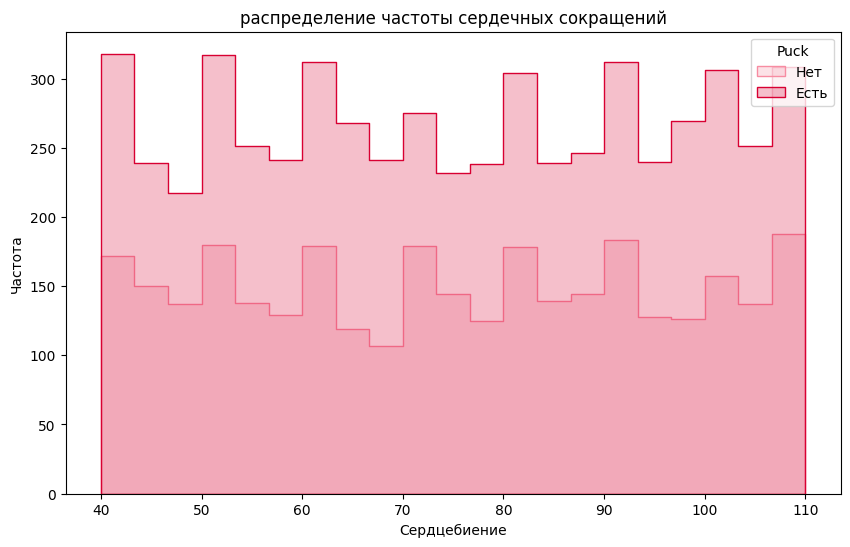

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Heart Rate', hue='Heart Attack Risk', element='step', common_norm=False, palette=['#D80032', '#F78CA2'])
plt.xlabel('Сердцебиение')
plt.ylabel('Частота')
plt.title('распределение частоты сердечных сокращений')
plt.legend(title='Puck', labels=['Нет', 'Есть'])
plt.show()

# О МОЙ БОГ ВСЕМОГУЩАЯ КОРРЕЛЯЦИЯ ПОКАЖИ МНЕ ЧТО ЭТО СЕНТЕТИЧЕСКИЙ ДАТАСЕТ НО Я ЗАМЕТИЛ ЭТО ПОЗДНО

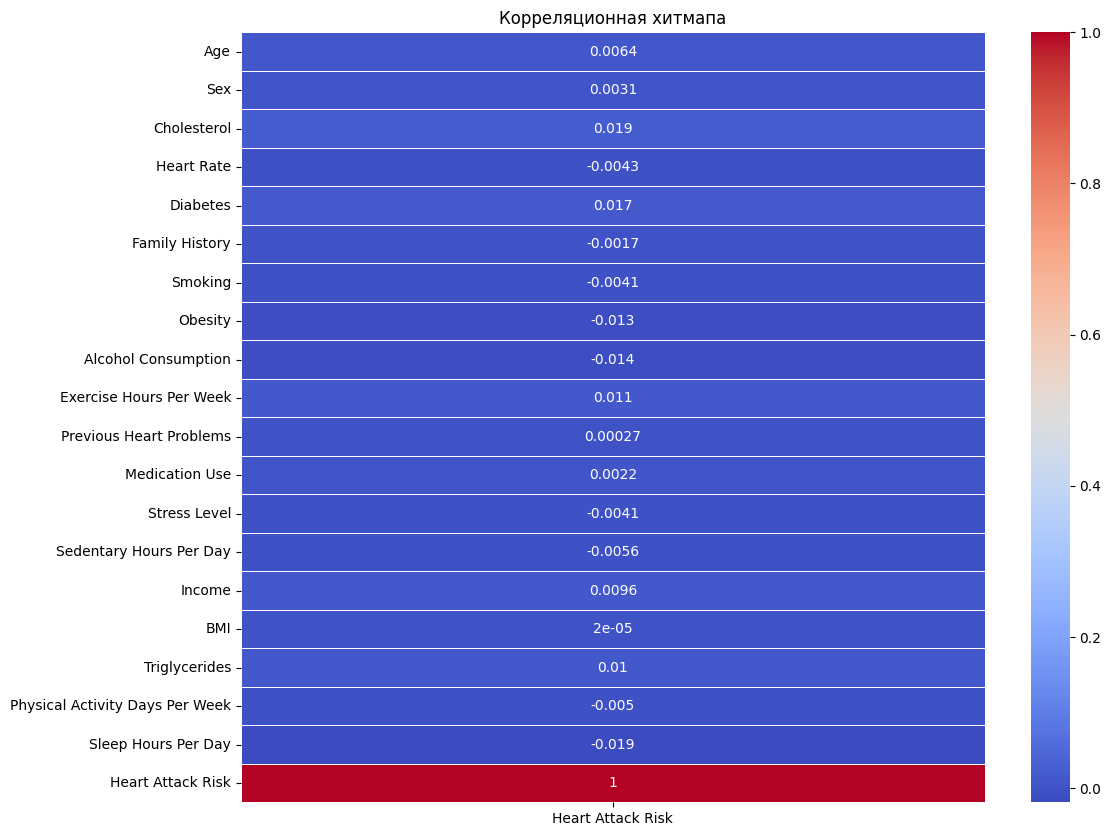

In [40]:
numeric_columns = df.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Heart Attack Risk']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная хитмапа')
plt.show()